In [15]:
import pandas as pd

In [16]:
titanic_df = pd.read_csv("Titanic_data.csv")

In [17]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Handling Null of Nan values

In [18]:
nan_count = titanic_df.isnull().sum()
nan_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
female_mean_age = titanic_df[titanic_df.Sex== "female"]["Age"].mean()
male_mean_age = titanic_df[titanic_df.Sex== "male"]["Age"].mean()
print(female_mean_age, male_mean_age)
 
titanic_df.loc[titanic_df.Sex == "female", "Age"] = titanic_df.loc[titanic_df.Sex == "female", "Age"].fillna(value = female_mean_age)
titanic_df.loc[titanic_df.Sex == "male", "Age"] = titanic_df.loc[titanic_df.Sex == "male", "Age"].fillna(value = male_mean_age)
 
titanic_df["Age"].isna().sum()

27.915708812260537 30.72664459161148


np.int64(0)

**Handling Null value for Age**  
Initials  
Each group of initials mean  
Impute to respective group  

In [20]:
def get_initials(fullname):
    firstname = fullname.split(",")[-1]
    initials = firstname.split(".")[0]
    return initials.strip()    

In [21]:
titanic_df["Initials"]=titanic_df['Name'].apply(get_initials)

In [22]:
titanic_df["Initials"].value_counts()

Initials
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [9]:
# dataframe.replace()

In [10]:
titanic_df['Initials'].replace(to_replace = "Dr",value = "Mr",inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_7348\1856305768.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Initials'].replace(to_replace = "Dr",value = "Mr",inplace = True)


In [11]:
titanic_df["Initials"].value_counts()

Initials
Mr              524
Miss            182
Mrs             125
Master           40
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [12]:
titanic_df['Initials'].replace(to_replace = "Sir",value = "Mr",inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_7348\3956103499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Initials'].replace(to_replace = "Sir",value = "Mr",inplace = True)


In [23]:
titanic_df["Initials"].value_counts()

Initials
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [30]:
replace_dict = { 
    "Dr":"Mr",
    "Col":"Mr",
    "Mlle":"Miss",
    "Ms":"Mrs",
    "Lady":"Miss",
    "Sir":"Mr",
    "Jonkheer":"Master",
    "the Countess":"Mrs",
    "Major":"Mr",
    "Don":"Mr",
    "Mme":"Mr",
    "Capt":"Mt",
    "Mt":"Mr"
}
titanic_df['Initials'].replace(to_replace = replace_dict,inplace = True)

In [31]:
titanic_df["Initials"].value_counts()

Initials
Mr        532
Miss      185
Mrs       127
Master     41
Rev         6
Name: count, dtype: int64

In [32]:
group_by_initials = titanic_df.groupby(by="Initials")
group_by_initials.Age.mean()

Initials
Master     7.940892
Miss      23.134949
Mr        32.364093
Mrs       34.744622
Rev       43.166667
Name: Age, dtype: float64

In [37]:
#dataframe.transform()
series_of_means = group_by_initials["Age"].transform('mean')

In [38]:
titanic_df.Age.fillna(series_of_means,inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_7348\7243987.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df.Age.fillna(series_of_means,inplace = True)


In [39]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [40]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initials         0
dtype: int64

<Axes: ylabel='Frequency'>

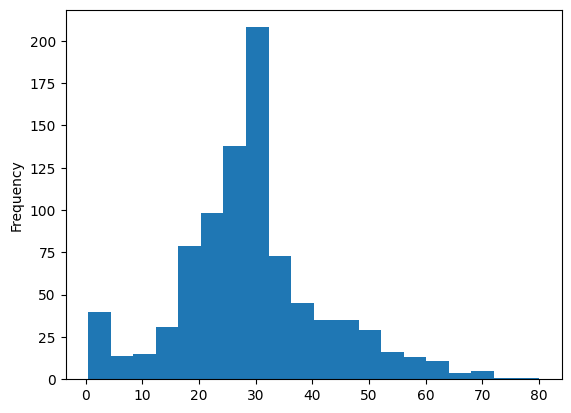

In [41]:
titanic_df.Age.plot.hist(bins=20)